# Sarah Quesnelle

## Research question/interests

Briefly describe your research question or interests here.

Q1) Does age affect the win/loss ratio?
- Do older fighters lose more fights as a result of old age, or do they win more fights from having more experience?

Q2) Does age affect the time spent in the ring?
- Are older fighters able to survive longer in the ring, or is it the younger fighters who survive longer?

Q3) Does a certain weight class getted KO-ed more often than other weight classes?
- Do fighters in lightweight class get knocked out more often than fighters in heavy weight, or vice versa.


In [10]:
import pandas as pd
import numpy as np
import seaborn as sea
import matplotlib.pyplot as plot

# Task 1

## Exploratory Data Analysis

In [4]:
import pandas as pd

data = pd.read_csv("..\data\processed\pre_processed_rajeev.csv")

# Lets test if we are loading in the data properly
# .sample(k) will print out k random rows from file
data.sample(5)

,Winner,title_bout,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,...,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Sideways,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Sideways,R_Stance_Southpaw,R_Stance_Switch
4397,Red,True,0.040039,0.015625,0.486724,0.390908,0.016602,0.154453,0.511719,0.001953,...,0,0,0,1,0,0,0,0,1,0
2129,Red,False,0.000000,0.000000,0.485000,0.650000,0.000000,0.770000,2.500000,0.000000,...,0,1,0,0,0,0,1,0,0,0
5328,Red,False,0.000000,0.000000,0.500000,0.800000,0.000000,1.000000,0.000000,0.000000,...,0,1,0,0,0,0,1,0,0,0
414,Red,True,0.000000,0.000000,0.595000,0.495000,0.375000,0.000000,0.250000,0.000000,...,0,1,0,0,0,0,1,0,0,0
3570,Red,False,0.000000,0.000000,0.640000,0.410000,0.000000,0.600000,3.000000,1.000000,...,0,0,0,1,0,0,1,0,0,0


This table above contains many useless columns as they are unable to answer the questions I have interest in. So I will need to figure out a way to extract the interesting columns later on.

# Task 2

## Data Analysis Pipeline

In [22]:
#Filter out the valuable columns
data_clean = data.filter(['Winner', 'B_age', 'R_age', 'B_wins', 'B_losses', 'R_wins', 'R_losses', 'B_current_win_streak', 'B_current_lose_streak', 'R_current_win_streak', 'R_current_lose_streak', 'B_total_time_fought(seconds)', 'R_total_time_fought(seconds)', 'B_Weight_lbs', 'R_Weight_lbs'])

data_clean.describe()

,B_age,R_age,B_wins,B_losses,R_wins,R_losses,B_current_win_streak,B_current_lose_streak,R_current_win_streak,R_current_lose_streak,B_total_time_fought(seconds),R_total_time_fought(seconds),B_Weight_lbs,R_Weight_lbs
count,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000
mean,29.288038,29.577601,2.581328,1.537106,3.759065,2.072179,0.948323,0.396645,1.316164,0.387326,617.475871,635.828848,170.556760,170.695527
std,4.009697,4.146936,3.306786,1.932314,3.856812,2.265217,1.489114,0.663071,1.724846,0.648878,227.818920,251.685490,36.825365,35.714689
min,18.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,7.000000,115.000000,115.000000
25%,26.000000,27.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,492.550647,471.000000,145.000000,145.000000
50%,29.000000,29.000000,1.000000,1.000000,3.000000,1.000000,0.000000,0.000000,1.000000,0.000000,638.500000,655.844101,170.000000,170.000000
75%,32.000000,32.000000,4.000000,2.000000,6.000000,3.000000,1.000000,1.000000,2.000000,1.000000,776.169312,825.000000,185.000000,185.000000
max,51.000000,47.000000,23.000000,16.000000,23.000000,17.000000,16.000000,5.000000,16.000000,4.000000,1500.000000,1500.000000,770.000000,345.000000


# Notes on this data

1500 seconds is the max time fought (1500 seconds = 25 minutes). This does follow UFC rules as those fights would be considered championship fights which are 5 rounds of 5 minutes each.

- https://victoryfighter.com/age-limits-in-mma-ufc/

Age ranges between 18 and 51. The website above mentions that the minimum age required to compete in the UFC is 18, so the minimum being 18 is allowed. Though the website do not explicitly mention an age limit, they do mention that human bodies physically decline at around age 40, and so I can assume that the maximum being 51 is an outlier. The graphs in the later sections should be able to confirm this.

- https://groundedmma.com/ufc-heavyweight-weight-limit/

Weight ranges between 115 lbs and 770 lbs. Looking at this above website, I can see there is an upper limit to the heavyweight class (265 lbs) as set by the UFC official rules, so the max values of 345 lbs and 770 lbs do not make sense. Therefore, any weight values above 265 will need to be removed. A weight of 115 lbs does make sense as those fighters would belong to the Atomweight class as defined by the website above.

In [23]:
# Remove all rows where Blue's weight is above 265 
data_clean = data_clean[data_clean.B_Weight_lbs <= 265]

# Remove all rows where Red's weight is above 265
data_clean = data_clean[data_clean.R_Weight_lbs <= 265]

# Now lets confirm if all weight values above 265 lbs are removed
data_clean.describe()

,B_age,R_age,B_wins,B_losses,R_wins,R_losses,B_current_win_streak,B_current_lose_streak,R_current_win_streak,R_current_lose_streak,B_total_time_fought(seconds),R_total_time_fought(seconds),B_Weight_lbs,R_Weight_lbs
count,5868.000000,5868.000000,5868.000000,5868.000000,5868.000000,5868.000000,5868.000000,5868.000000,5868.000000,5868.000000,5868.000000,5868.000000,5868.000000,5868.000000
mean,29.286810,29.576346,2.592365,1.543626,3.775392,2.080607,0.951943,0.398432,1.320041,0.388207,618.246418,637.142308,169.850204,170.191207
std,4.017312,4.151322,3.311943,1.934932,3.860839,2.267852,1.492122,0.664222,1.727714,0.649588,227.602400,251.093640,34.923880,35.029257
min,18.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,7.000000,115.000000,115.000000
25%,26.000000,27.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,492.745972,471.937500,145.000000,145.000000
50%,29.000000,29.000000,1.000000,1.000000,3.000000,1.000000,0.000000,0.000000,1.000000,0.000000,638.500000,655.844101,170.000000,170.000000
75%,32.000000,32.000000,4.000000,2.000000,6.000000,3.000000,1.000000,1.000000,2.000000,1.000000,777.974609,826.615906,185.000000,185.000000
max,51.000000,47.000000,23.000000,16.000000,23.000000,17.000000,16.000000,5.000000,16.000000,4.000000,1500.000000,1500.000000,265.000000,265.000000


In [8]:
# A sample of 5 fighters data with no absurd weight values

data_clean.sample(5)

,Winner,B_age,R_age,B_wins,R_wins,B_current_win_streak,R_current_win_streak,B_total_time_fought(seconds),R_total_time_fought(seconds),B_Weight_lbs,R_Weight_lbs
419,Blue,32.0,38.0,1,11,1,4,163.00000,509.67552,145.0,155.0
2826,Red,27.0,32.0,0,0,0,0,900.00000,217.00000,185.0,170.0
5576,Red,37.0,29.0,1,5,0,2,1200.00000,915.06250,170.0,170.0
506,Blue,35.0,24.0,6,1,1,1,666.76709,900.00000,115.0,115.0
4279,Red,28.0,35.0,0,0,0,0,900.00000,727.75000,135.0,145.0


<AxesSubplot:>

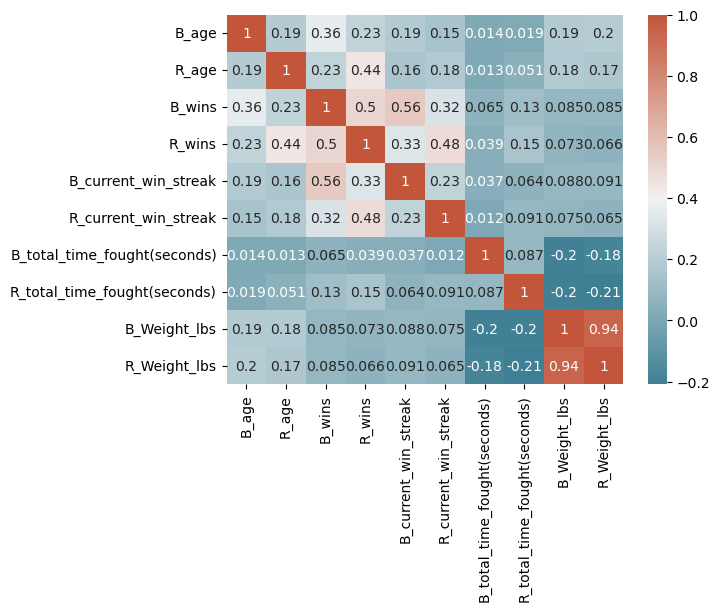

In [11]:
# Are there a correlation between any of the columns I am interested in.

correlation = data_clean.corr()

sea.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True, cmap=sea.diverging_palette(220, 20, as_cmap=True))

In [17]:
# Is there a relationship between a fighters age and winning

Winner_age = data.filter(['B_wins', 'B_current_win_streak', 'B_age', 'R_wins', 'R_current_win_streak', 'R_age'])

Winner_age.describe()

,B_wins,B_current_win_streak,B_age,R_wins,R_current_win_streak,R_age
count,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000
mean,2.581328,0.948323,29.288038,3.759065,1.316164,29.577601
std,3.306786,1.489114,4.009697,3.856812,1.724846,4.146936
min,0.000000,0.000000,18.000000,0.000000,0.000000,19.000000
25%,0.000000,0.000000,26.000000,1.000000,0.000000,27.000000
50%,1.000000,0.000000,29.000000,3.000000,1.000000,29.000000
75%,4.000000,1.000000,32.000000,6.000000,2.000000,32.000000
max,23.000000,16.000000,51.000000,23.000000,16.000000,47.000000


In [19]:
Winner_age.sample(6)

,B_wins,B_current_win_streak,B_age,R_wins,R_current_win_streak,R_age
3620,0,0,31.0,4,0,31.0
5500,1,1,24.0,0,0,26.0
1192,5,2,35.0,4,1,35.0
1863,0,0,32.0,4,3,32.0
3230,1,1,30.0,2,2,27.0
329,4,0,33.0,10,0,32.0


In [25]:
# time is in seconds

#Create a histogram from number of wins vs time

Winner_time = data.filter(['Winner', 'B_total_time_fought(seconds)', 'R_total_time_fought(seconds)'])

print(f"Win vs Time:\n {Winner_time.sample(10)}\n")

Win vs Time:
      Winner  B_total_time_fought(seconds)  R_total_time_fought(seconds)
1202   Blue                    638.500000                    900.224243
1331   Blue                    425.859375                    900.000000
4212    Red                    741.187500                    856.953125
598    Blue                    900.000000                    554.500000
1377    Red                    900.000000                    900.000000
490     Red                    479.937500                    518.000000
5086    Red                    638.500000                    701.500000
4138   Blue                    802.000000                    542.928580
2415    Red                    638.500000                    285.000000
4440    Red                    638.500000                    655.844101



# Task 3

## Method Chaining and writing Python programs

# Task 4

## Conduct your analysis to help answer your research question(s)